In [29]:
#Packages
import openpyxl
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import subprocess
import numpy as np
from IPython import display
#Helper functions
def plot_scatter(dataframe, guide, title, xlabel, ylabel, legend_label):
    i = 0
    if guide == 'x':
        for index, row in dataframe.iterrows():
            if index % 2 != 0: 
                i+= 1
                plt.scatter(list(element + 1 for element in list(range(dataframe.shape[1]))), dataframe.iloc[index], label=legend_label + f'{i}')
    elif guide == 'y':
        for index, row in dataframe.iterrows():
            if index % 2 == 0: 
                i+= 1
                plt.scatter(list(element + 1 for element in list(range(dataframe.shape[1]))), dataframe.iloc[index], label=legend_label + f'{i}')
    else: 
        raise Exception('Select the fiber x or y')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def RyR(dataframe):
    i = 0; df_RyR = []
    std = dataframe.iloc[:, :-2].std(axis=1) #Standard deviation for each row, excluding limits
    for index, _ in enumerate(range(dataframe.shape[0])):
        i+= 1
        RyR = (6*std.iloc[index]/(dataframe.iloc[index,-1]-dataframe.iloc[index,-2]))*100
        df_RyR.append(float(RyR))
    df_RyR = pd.DataFrame(df_RyR)
    x_fiber = df_RyR[df_RyR.index % 2 != 0]
    y_fiber = df_RyR[df_RyR.index % 2 == 0]
    dfx = pd.DataFrame(x_fiber).reset_index(drop=True)
    dfy = pd.DataFrame(y_fiber).reset_index(drop=True)
    for i, _ in enumerate(range(dfx.shape[0])):
        Pass = "Correcto" if dfx.iloc[i, 0] <= 10 else ("Fallo ligero" if 10 <= dfx.iloc[i, 0] <= 25 else "Fallo considerable")
        print(f'RyR Guía fbx {dfx.index[i]+1}: ' + str(dfx.iloc[i, 0]) +' %' + ' Estatus: ' + Pass)
    print("")
    for i, _ in enumerate(range(dfy.shape[0])):
        Pass = "Correcto" if dfy.iloc[i, 0] <= 10 else ("Fallo ligero" if 10 <= dfy.iloc[i, 0] <= 25 else "Fallo considerable")
        print(f'RyR Guía fby {dfy.index[i]+1}: ' + str(dfy.iloc[i, 0]) +' %' + ' Estatus: ' + Pass)
    return dfx, dfy

def z_score_filter(dataframe, threshold):
    rows = []
    MEAS = dataframe.iloc[:, :-2]
    limits = dataframe.iloc[:, -2:]    
    for row in range(MEAS.shape[0]):
        row = MEAS.iloc[row, :]
        z_scores = (row - row.mean()) / row.std()
        filtered_row = np.where(abs(z_scores) <= threshold, row, np.nan)
        rows.append(filtered_row)
    filtered_df = pd.DataFrame(rows)
    filtered_df = pd.concat([filtered_df, limits], axis=1)
    return filtered_df

Data Extraction and visualization

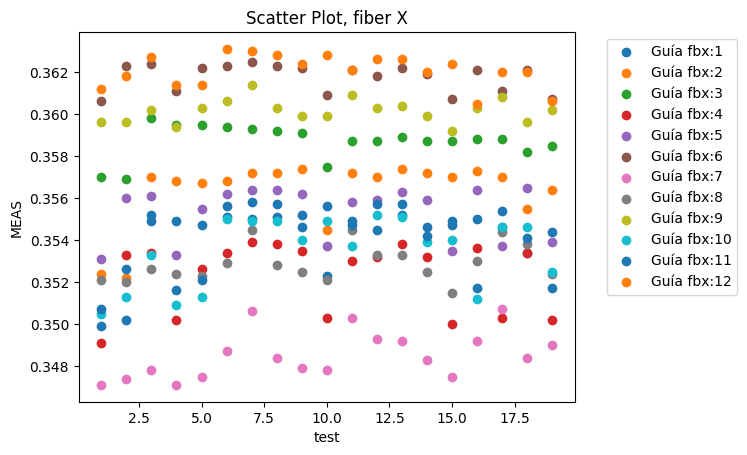

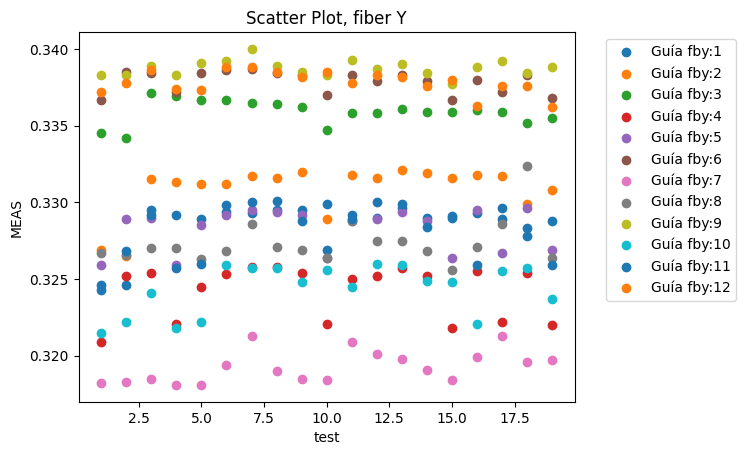

In [30]:
#Imports the data from a prepocessed working sheet
data = pd.read_excel("./2_Results/Target.xlsx", header=None)
#Slice the measure from the data
df = data.iloc[3:, 1:-2] #Slices the dataframe, deleting the first empty rows and the columns for tags and df_plus_limits
df = df.reset_index(drop=True) #Resets the rows index to start in zero again
df.columns = range(df.shape[1]) #Resets the columns index to start in zero again
#Plots the measures for each scale
plot_scatter(df, 'x', 'Scatter Plot, fiber X', 'test', 'MEAS', f'Guía fbx:')
plot_scatter(df, 'y', 'Scatter Plot, fiber Y', 'test', 'MEAS', f'Guía fby:')

RyR calculation

In [31]:
#Slices the dataframe to obtain only the measures and limits for each fiber
df_plus_limits = pd.concat([df, data.iloc[3:, -2:].reset_index(drop=True)], axis=1) #Reset the index to avoid index mismatching
df_plus_limits = df_plus_limits.reset_index(drop=True) #Resets the rows index to start in zero again
df_plus_limits.columns = range(df_plus_limits.shape[1]) #Resets the columns index to start in zero again
#Generates a RyR for each fiber in every scale
RyRx, RyRy = RyR(df_plus_limits)

RyR Guía fbx 1: 29.231782777545206 % Estatus: Fallo considerable
RyR Guía fbx 2: 28.804410597779306 % Estatus: Fallo considerable
RyR Guía fbx 3: 12.713263127069194 % Estatus: Fallo ligero
RyR Guía fbx 4: 30.107503162054694 % Estatus: Fallo considerable
RyR Guía fbx 5: 23.0739115376958 % Estatus: Fallo ligero
RyR Guía fbx 6: 10.515922847210058 % Estatus: Fallo ligero
RyR Guía fbx 7: 20.5096723027755 % Estatus: Fallo ligero
RyR Guía fbx 8: 15.94175275600955 % Estatus: Fallo ligero
RyR Guía fbx 9: 8.70202990062155 % Estatus: Correcto
RyR Guía fbx 10: 29.827853360782193 % Estatus: Fallo considerable
RyR Guía fbx 11: 31.55622400267868 % Estatus: Fallo considerable
RyR Guía fbx 12: 12.08054805657159 % Estatus: Fallo ligero

RyR Guía fby 1: 37.667129324902824 % Estatus: Fallo considerable
RyR Guía fby 2: 39.608611503852785 % Estatus: Fallo considerable
RyR Guía fby 3: 16.486562599723097 % Estatus: Fallo ligero
RyR Guía fby 4: 41.02846252106093 % Estatus: Fallo considerable
RyR Guía fby 5: 32

Filtering

![title](./3_Extra/Z-score.jpg)

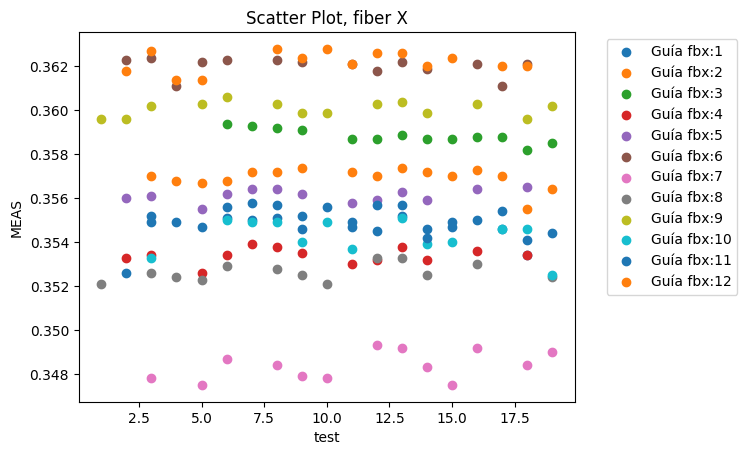

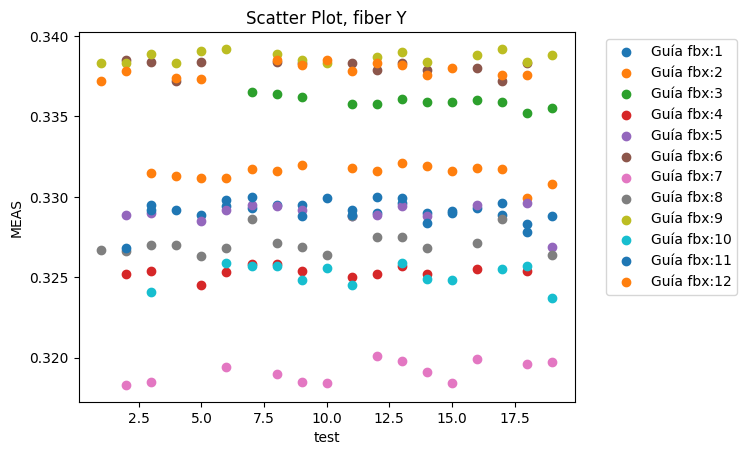

In [32]:
#Filter values by their row z-score
z_df = z_score_filter(df_plus_limits, 1)
#Plot the filtered values
plot_scatter(z_df.iloc[:, :-2], 'x', 'Scatter Plot, fiber X', 'test', 'MEAS', f'Guía fbx:')
plot_scatter(z_df.iloc[:, :-2], 'y', 'Scatter Plot, fiber Y', 'test', 'MEAS', f'Guía fbx:')

In [33]:
#Split the dataframe for x fiber and y fiber
x_fiber = z_df[z_df.index % 2 == 0]
y_fiber = z_df[z_df.index % 2 != 0]
#Calculate the new RyR
RyRx, RyRy = RyR(z_df)

RyR Guía fbx 1: 8.217933758659145 % Estatus: Correcto
RyR Guía fbx 2: 8.52722103751223 % Estatus: Correcto
RyR Guía fbx 3: 5.2611332138021805 % Estatus: Correcto
RyR Guía fbx 4: 6.447992339710715 % Estatus: Correcto
RyR Guía fbx 5: 5.308854610445341 % Estatus: Correcto
RyR Guía fbx 6: 6.567775360887206 % Estatus: Correcto
RyR Guía fbx 7: 11.895925034318546 % Estatus: Fallo ligero
RyR Guía fbx 8: 7.324987063034046 % Estatus: Correcto
RyR Guía fbx 9: 5.151061915790773 % Estatus: Correcto
RyR Guía fbx 10: 14.191497503738093 % Estatus: Fallo ligero
RyR Guía fbx 11: 16.303029065110767 % Estatus: Fallo ligero
RyR Guía fbx 12: 7.505135071998153 % Estatus: Correcto

RyR Guía fby 1: 10.377282881371329 % Estatus: Fallo ligero
RyR Guía fby 2: 12.886271764944162 % Estatus: Fallo ligero
RyR Guía fby 3: 7.398650424575404 % Estatus: Correcto
RyR Guía fby 4: 8.402197514752945 % Estatus: Correcto
RyR Guía fby 5: 16.31643141333093 % Estatus: Fallo ligero
RyR Guía fby 6: 9.05181887028861 % Estatus: Corre